# Why we do this project?

해당 캐글 데이터셋은 간염의 1~4단계를 가진 환자로부터, 탐색적 데이터 분석을 진행하여 인사이트를 얻고 이를 어떻게 다룰 것인지 알아보려 합니다.

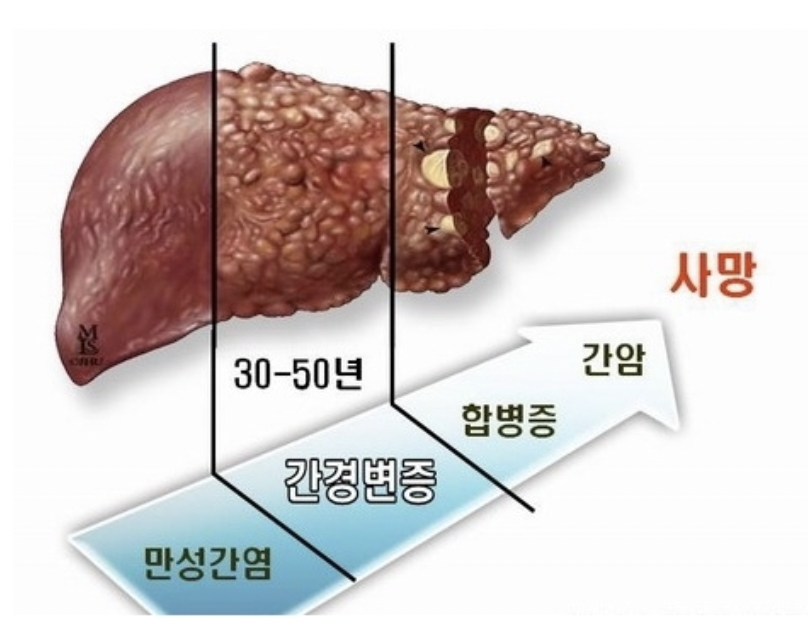

# LIbrary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import seaborn as sns
sns.set(style='white', font_scale=2)

import warnings
warnings.filterwarnings('ignore')

# Loading

In [56]:
data = pd.read_csv("./cirrhosis.csv")
data.head()

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin   Copper  Alk_Phos     SGOT  \
0     Y    14.5000     261.0000   2.6000 156.0000 1718.0000 137.9500   
1     N     1.1000     302.0000   4.1400  54.0000 7394.8000 113.5200   
2     S     1.4000     176.0000   3.4800 210.0000  516.0000  96.1000   
3     S     1.8000     244.0000   2.5400  64.0000 6121.8000  60.6300   
4     N     3.4000     279.0000   3.5300 143.0000  671.0000 113.1500   

   Tryglicerides  Platelets  Prothrombin  Stage  
0       172.0000   190.0000      12.2000 4.0000  
1        88.0000   221.0000      10.6000 3.0000  
2        55.0000   151.0000      12.0000 4.0000  
3        92.0000   183.0000      10.3000 4.0000  
4        72.0000   136.0000      10.9000 3.0000

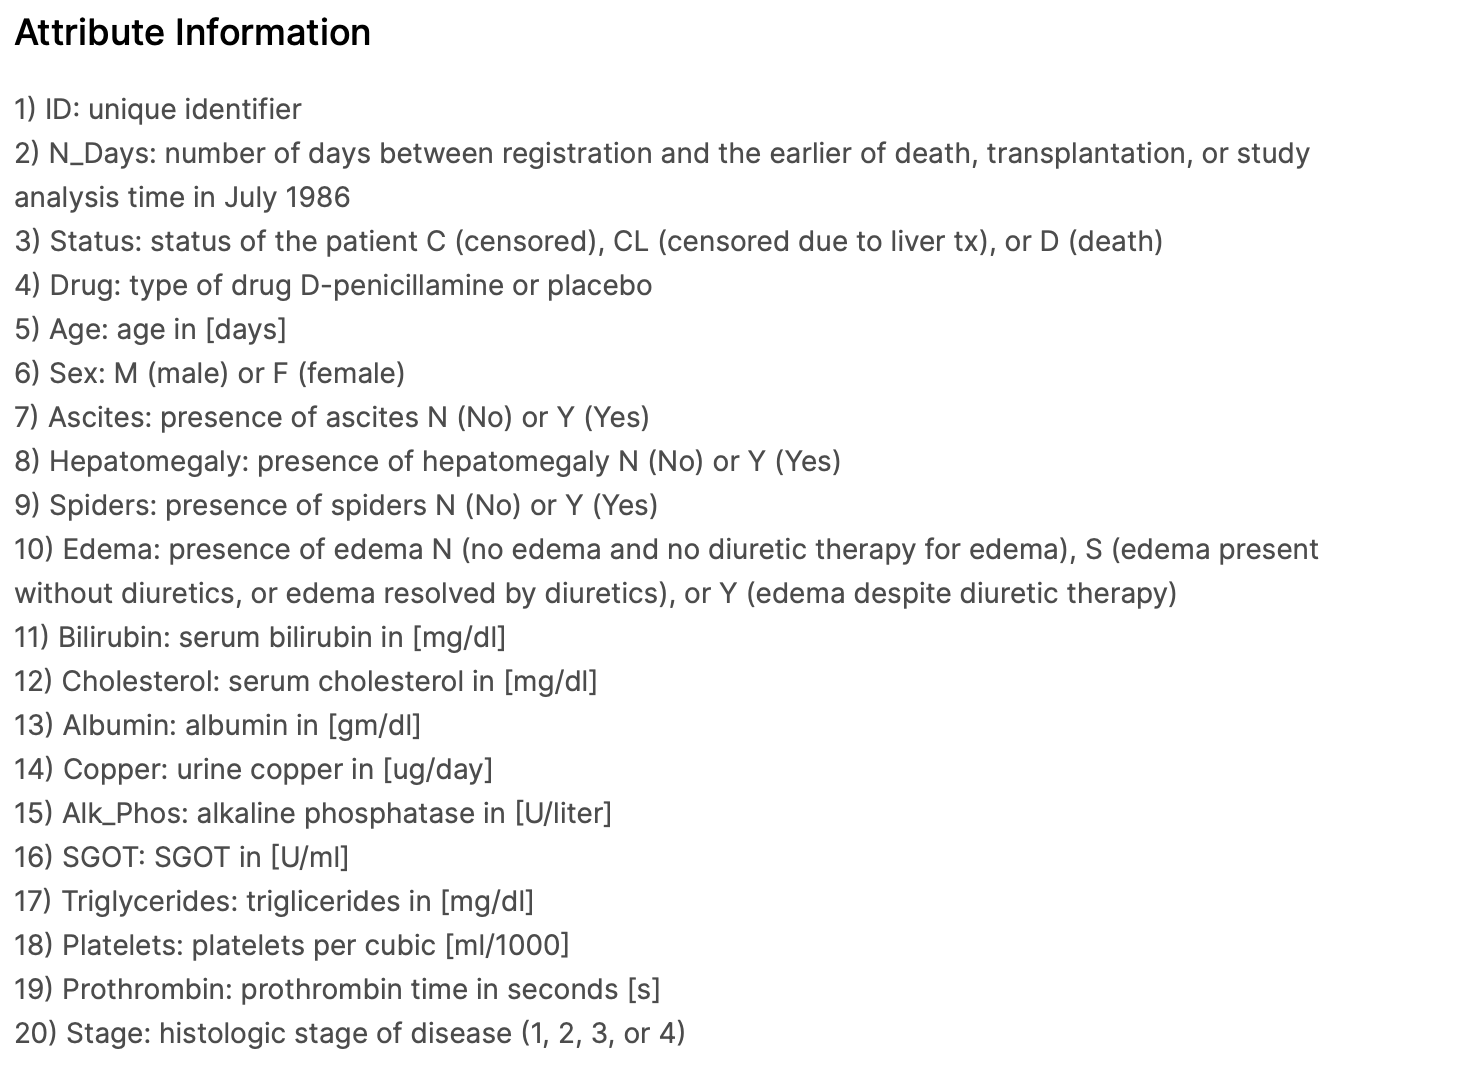

# Data Wrangling

In [3]:
data.shape

(418, 20)

**Obseravation**

* 해당 데이터셋은 418개의 열과 20개의 변수로 구성되어 있습니다.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [6]:
data.describe()

ID    N_Days        Age  Bilirubin  Cholesterol  Albumin   Copper  \
count 418.0000  418.0000   418.0000   418.0000     284.0000 418.0000 310.0000   
mean  209.5000 1917.7823 18533.3517     3.2208     369.5106   3.4974  97.6484   
std   120.8105 1104.6730  3815.8451     4.4075     231.9445   0.4250  85.6139   
min     1.0000   41.0000  9598.0000     0.3000     120.0000   1.9600   4.0000   
25%   105.2500 1092.7500 15644.5000     0.8000     249.5000   3.2425  41.2500   
50%   209.5000 1730.0000 18628.0000     1.4000     309.5000   3.5300  73.0000   
75%   313.7500 2613.5000 21272.5000     3.4000     400.0000   3.7700 123.0000   
max   418.0000 4795.0000 28650.0000    28.0000    1775.0000   4.6400 588.0000   

        Alk_Phos     SGOT  Tryglicerides  Platelets  Prothrombin    Stage  
count   312.0000 312.0000       282.0000   407.0000     416.0000 412.0000  
mean   1982.6558 122.5563       124.7021   257.0246      10.7317   3.0243  
std    2140.3888  56.6995        65.1486    98.3256       1.0220   0.8820  
min     289.0000  26.3500        33.0000    62.0000       9.0000   1.0000  
25%     871.5000  80.6000        84.2500   188.5000      10.0000   2.0000  
50%    1259.0000 114.7000       108.0000   251.0000      10.6000   3.0000  
75%    1980.0000 151.9000       151.0000   318.0000      11.1000   4.0000  
max   13862.4000 457.2500       598.0000   721.0000      18.0000   4.0000

**Observation**

* N_Days의 최솟값과 최댓값의 차이가 크기 때문에 Skew가 있을 것입니다.
* Cholesterol에서 평균값이나 최솟값과 최댓값의 차이가 너무 크기 때문에 이상치로 간주될 가능성이 있습니다.
* Stage 변수는 우리가 예측할 변수이며, 평균 3이라는 레벨을 가지고 있습니다.

In [3]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

**Obsravation**

* 결측값이 존재하는 변수가 있습니다.
    * 몇몇 컬럼에서 데이터의 1/3이 결측값을 가지고 있습니다. 본래는 Drop을 하지만, 너무 많은 변수를 버리게 되며 적은 수의 변수로는 모델에 좋은 성능을 기대하기 어렵습니다. Drop을 하지 않고 채우도록 하겠습니다.

<AxesSubplot:>

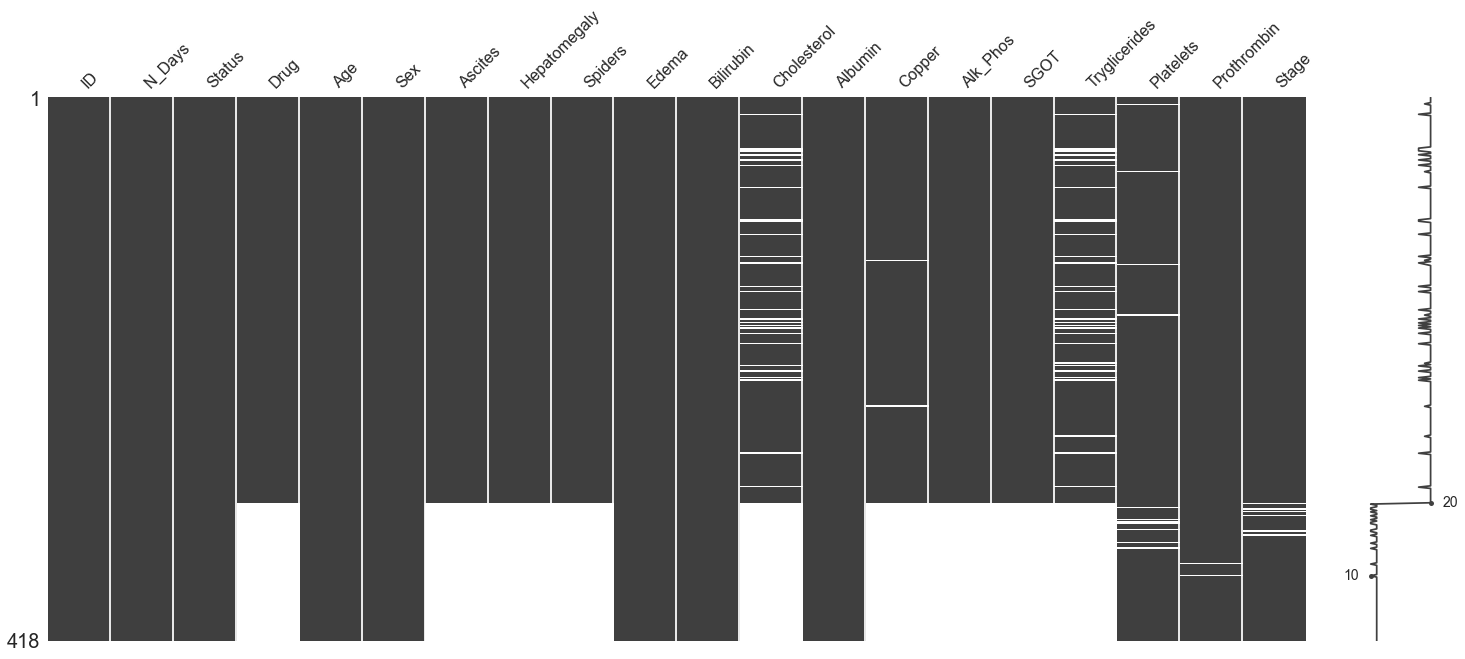

In [6]:
#Missing data Viz
import missingno as msno
msno.matrix(data)

In [5]:
data[data.duplicated()]

Empty DataFrame
Columns: [ID, N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

**Obseravation**

* 중복된 열은 존재하지 않습니다.

# VIZ

In [57]:
data.drop(['ID'],1,inplace=True)

In [58]:
num_cols = data.select_dtypes(exclude='object').columns.tolist()
cat_cols = data.select_dtypes(include='object').columns.tolist()
num_cols.remove('Stage')

## Target

<AxesSubplot:>

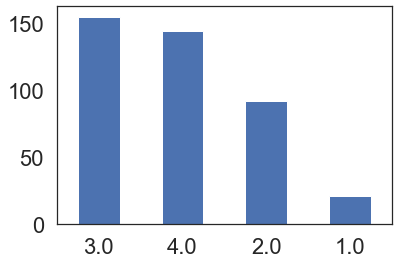

In [251]:
data['Stage'].value_counts().plot.bar(rot=0)

**Obseravation**

* 타겟 변수에 데이터 불균형이 존재합니다. 추후 계층별 StratifiedKFold를 진행하여야 합니다.

## Numerical Variables

In [105]:
def show_dist_plot(data,columns,figsize=(24,16)):
    i = 0
    plt.figure(figsize=figsize)
    f,ax = plt.subplots(4,3,figsize=figsize)
    for col in columns:
        i += 1 
        plt.subplot(4,3,i)
        sns.kdeplot(data[col],fill=True)
        plt.title(f'Distribution of {col}')
        plt.suptitle("Num cols", fontsize= 20,fontweight='bold', x=0.5, y = 1.0)
    plt.tight_layout()
    
def show_count_plot(data,columns,figsize=(24,16)):
    i = 0
    plt.figure(figsize=figsize)
    f,ax = plt.subplots(4,2,figsize=figsize)
    for col in columns:
        i += 1 
        plt.subplot(4,2,i)
        sns.countplot(data[col])
        plt.title(f'Distribution of {col}')
        plt.suptitle("Cat cols", fontsize= 20,fontweight='bold', x=0.5, y = 1.0)
    plt.tight_layout()

<Figure size 1728x1152 with 0 Axes>

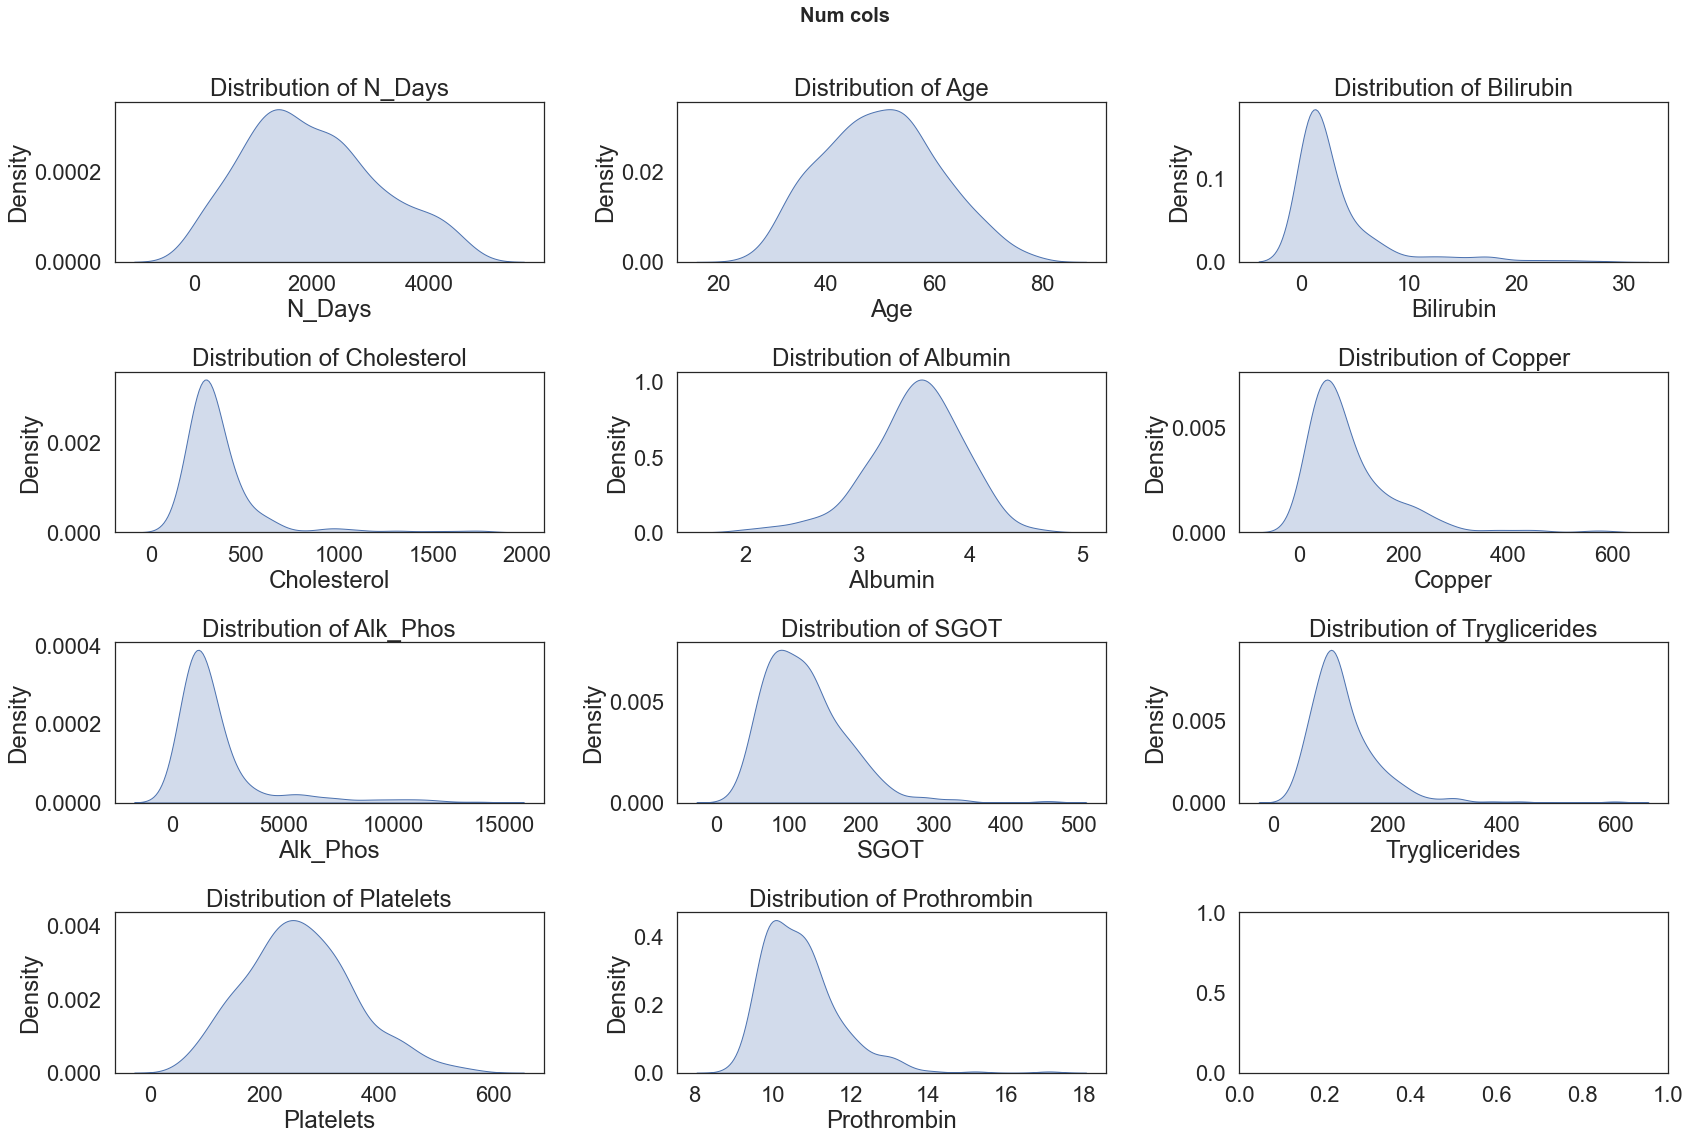

In [175]:
show_dist_plot(data, num_cols)

**Obseravation**

* 왜도가 심한 변수가 존재합니다. 정규분포로 바꾸어줘야 합니다.

<Figure size 1728x1152 with 0 Axes>

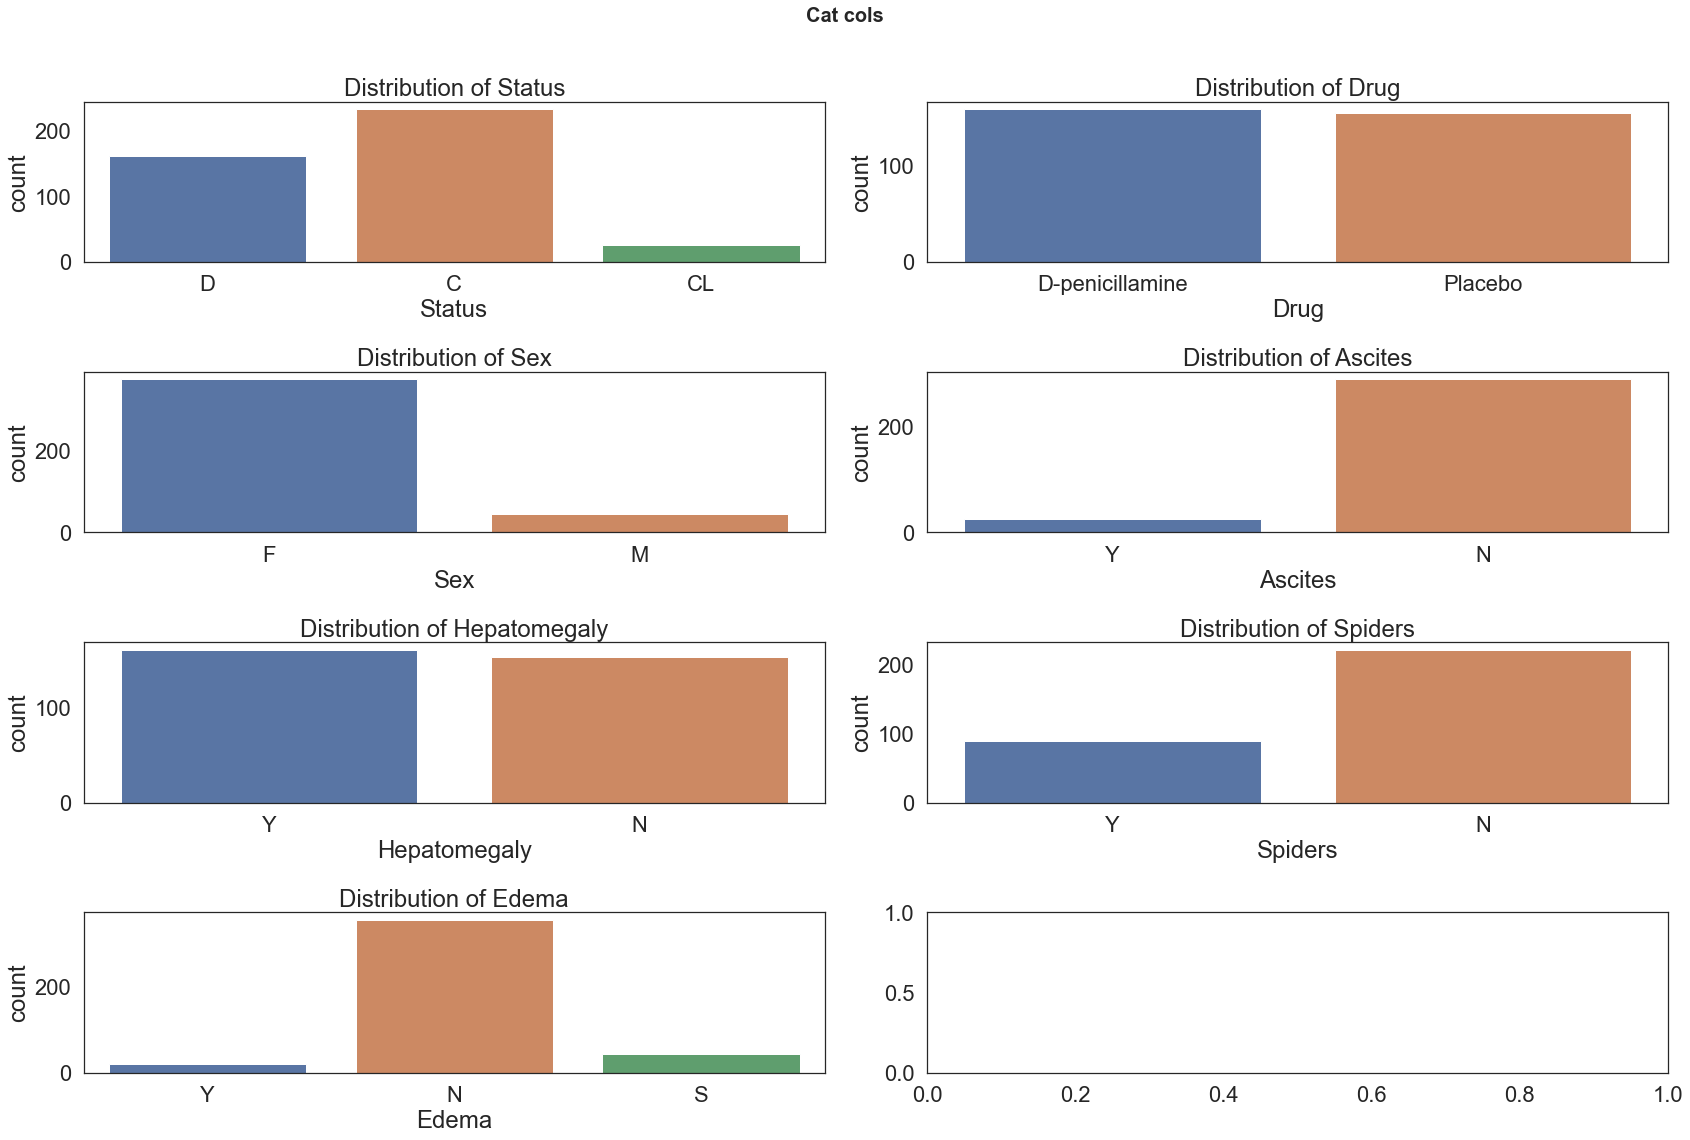

In [88]:
show_count_plot(data,cat_cols)

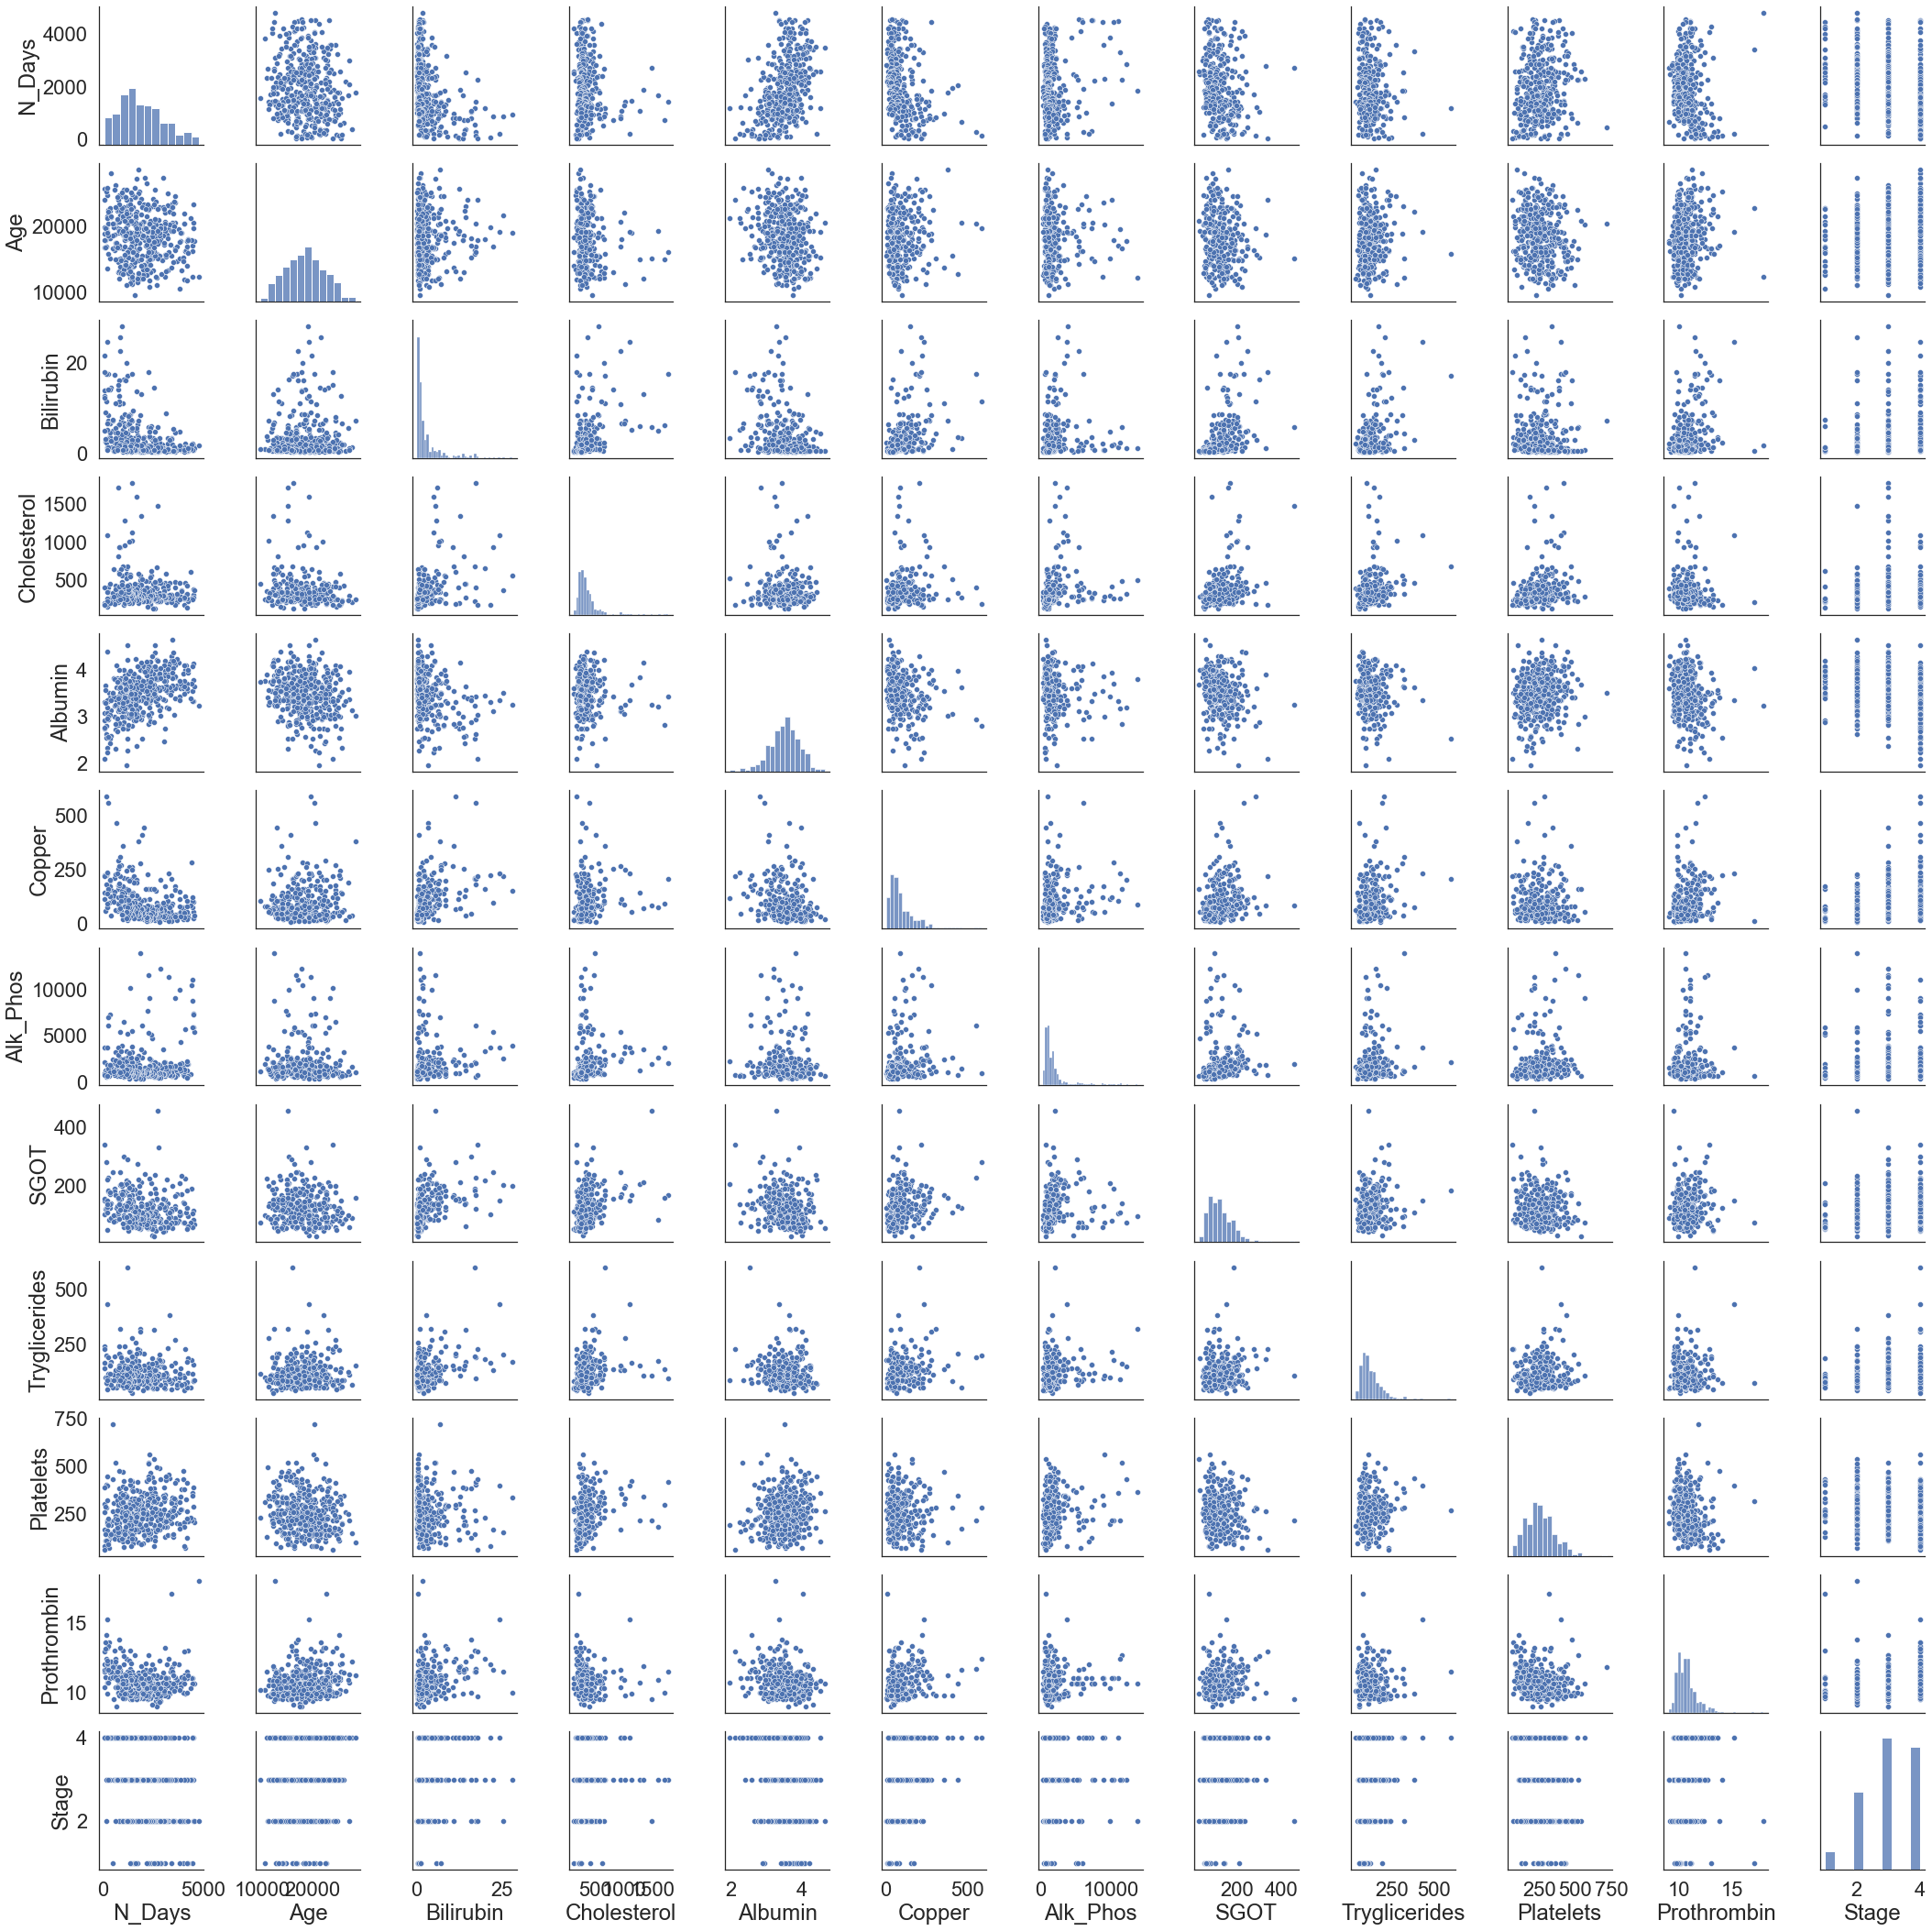

In [59]:
sns.pairplot(data,palette='set3')

<AxesSubplot:title={'center':'Corr with target'}>

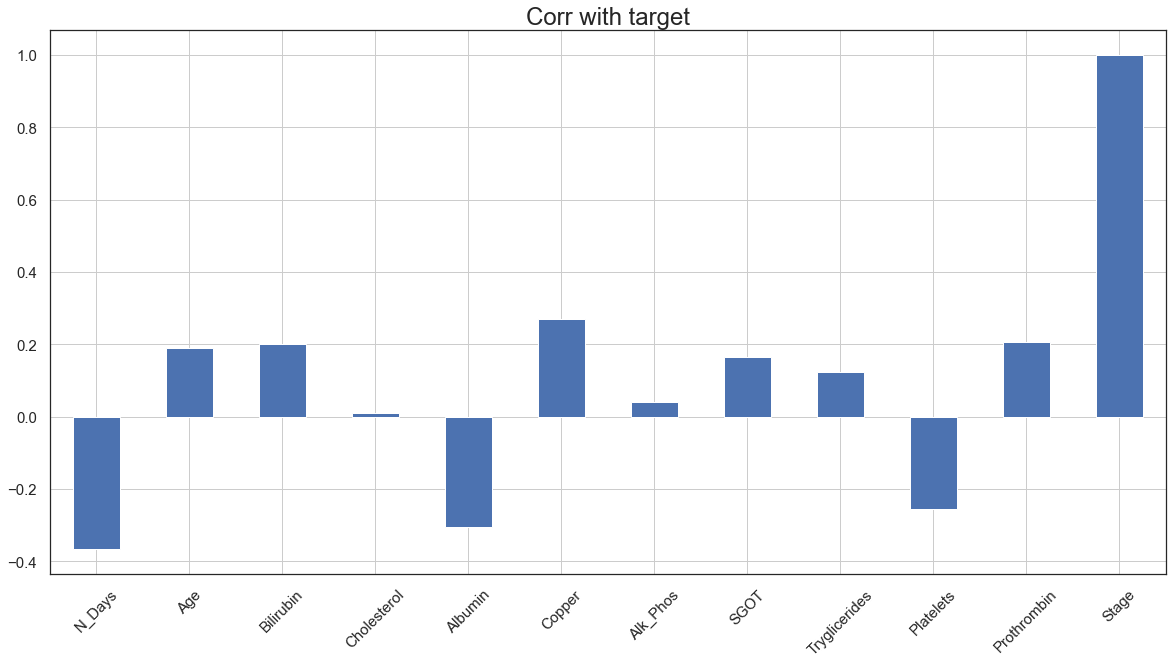

In [89]:
data.drop(columns=cat_cols,axis=1).corrwith(data.Stage).plot.bar(figsize=(20,10), title="Corr with target", fontsize=15,rot=45,grid=True)

**Obseravation**

* 강한 선형 관계를 보여주는 변수가 없습니다. 비선형 회귀를 해야겠습니다.

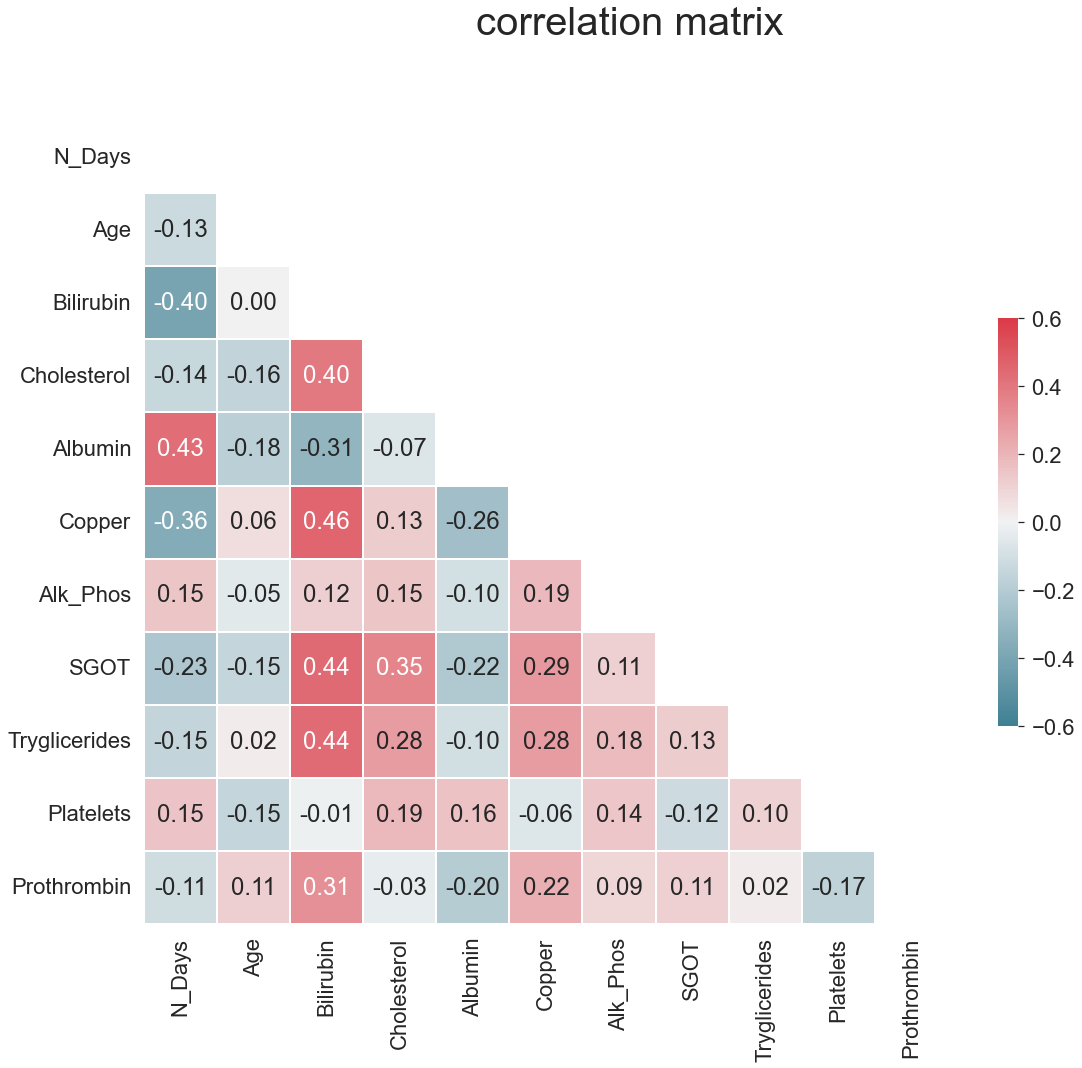

In [253]:


corr = data.drop(columns=['Stage']).corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True #대각선을 기준으로 아래를 보자.

f,ax=plt.subplots(figsize=(18,15))
f.suptitle('correlation matrix', fontsize=40)

cmap = sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, vmax=.6,vmin=-.6,center=0,cmap=cmap,
          square=True,linewidth=.3,cbar_kws={'shrink':.5},annot=True, fmt='.2f');
#plt.tick_params(labelsize=25)하면 label크기 조정됨


**Obseravation**

* Heatmap은 변수 간 선형적 관계를 나타냅니다. 만약 변수 간 관련성이 높다면 다중공선성이 의심되며 변수 제거를 생각해볼 수 있습니다.

# EDA

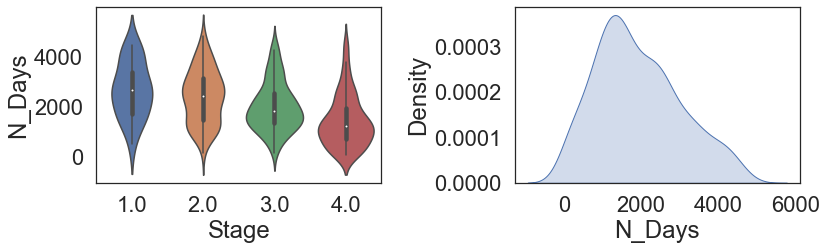

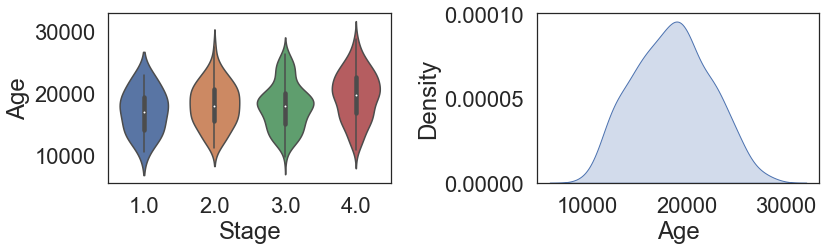

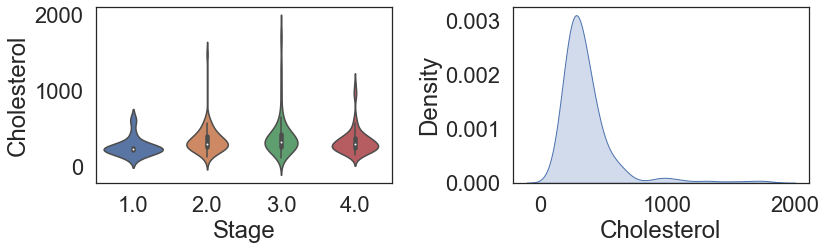

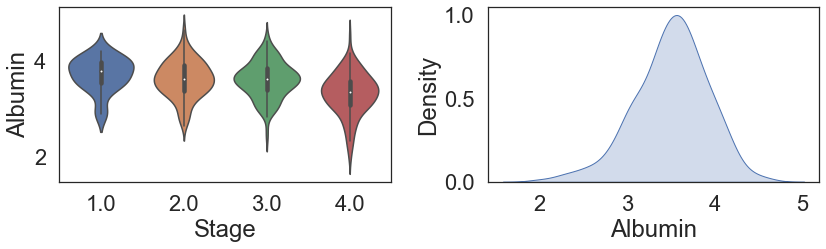

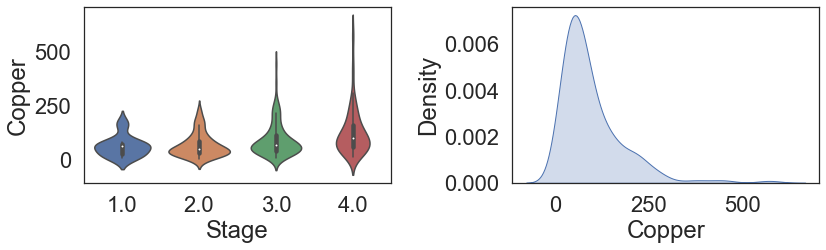

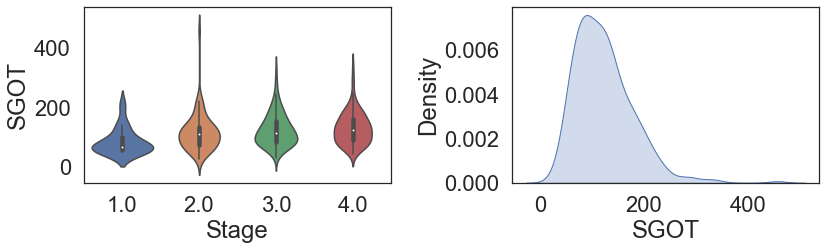

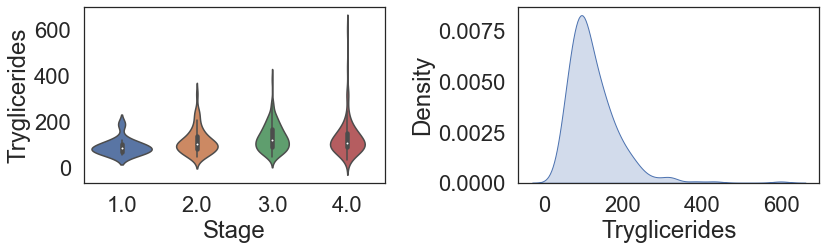

In [52]:
def show_hist_by_target(df, columns):
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x='Stage', y=column, data=df, ax=axs[0][0] )
        sns.kdeplot(df[column], ax=axs[0][1], fill=True)
        plt.tight_layout()

show_hist_by_target(data,num_cols)

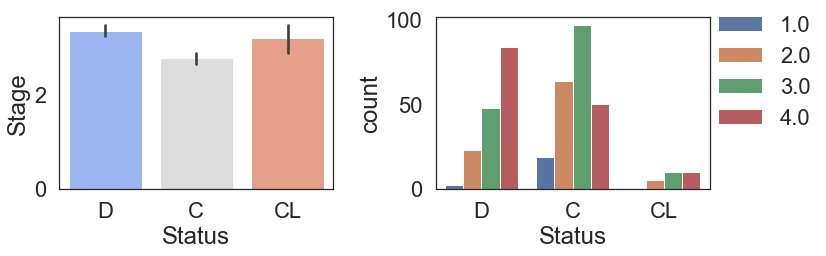

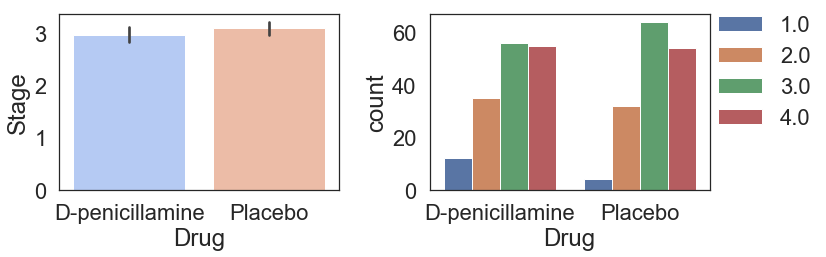

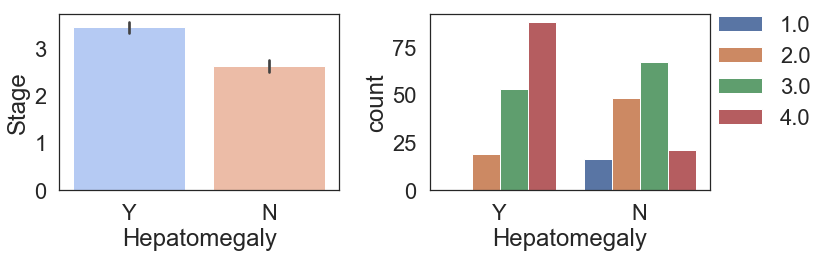

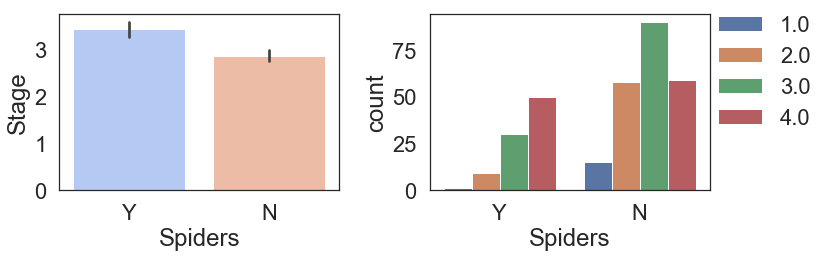

In [123]:
def show_count_plot_by_target(data, columns):
    for _ in columns:
        f, ax = plt.subplots(1,2,figsize=(12,4))
        sns.barplot(x=data[_],y=data['Stage'],palette='coolwarm',ax=ax[0])
        sns.countplot(data[_],hue=data['Stage'])
        plt.legend(loc=[1,.3])
        plt.tight_layout()
        
show_count_plot_by_target(data, cat_cols)

**Obseravation**

* 진행 상황이 3단계인 경우, 즉 어느정도 진행이 된 경우에 검출이 됩니다. 조기 발견이 중요합니다. 4단계가 진행이 되었을 때, 검출이 되기 보다 사망하게 됩니다.
* 간병변의 단계는 Sex(성별)에 상관없이 모두에게 위험합니다.
* Ascites(복부 내에 체액이 저류)를 가지고 있을 때 높은 위험을 나타냅니다.
* Hepatomegaly(간비대)를 가지고 있을 때 높은 수준의 위험을 나타냅니다.
* Edema(부종, 발이 부풀어오르는 현상), 이뇨제 치료에도 불구하고 부종을 가진 경우에 가장 위험한 수준을 나타냅니다.

Ascites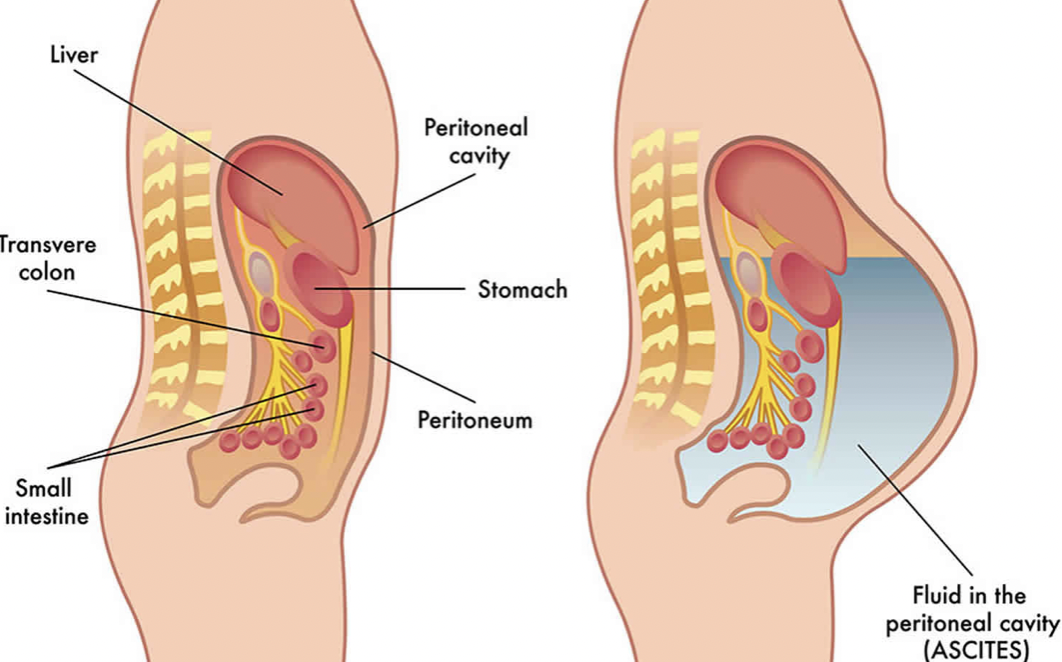

<Figure size 1728x864 with 0 Axes>

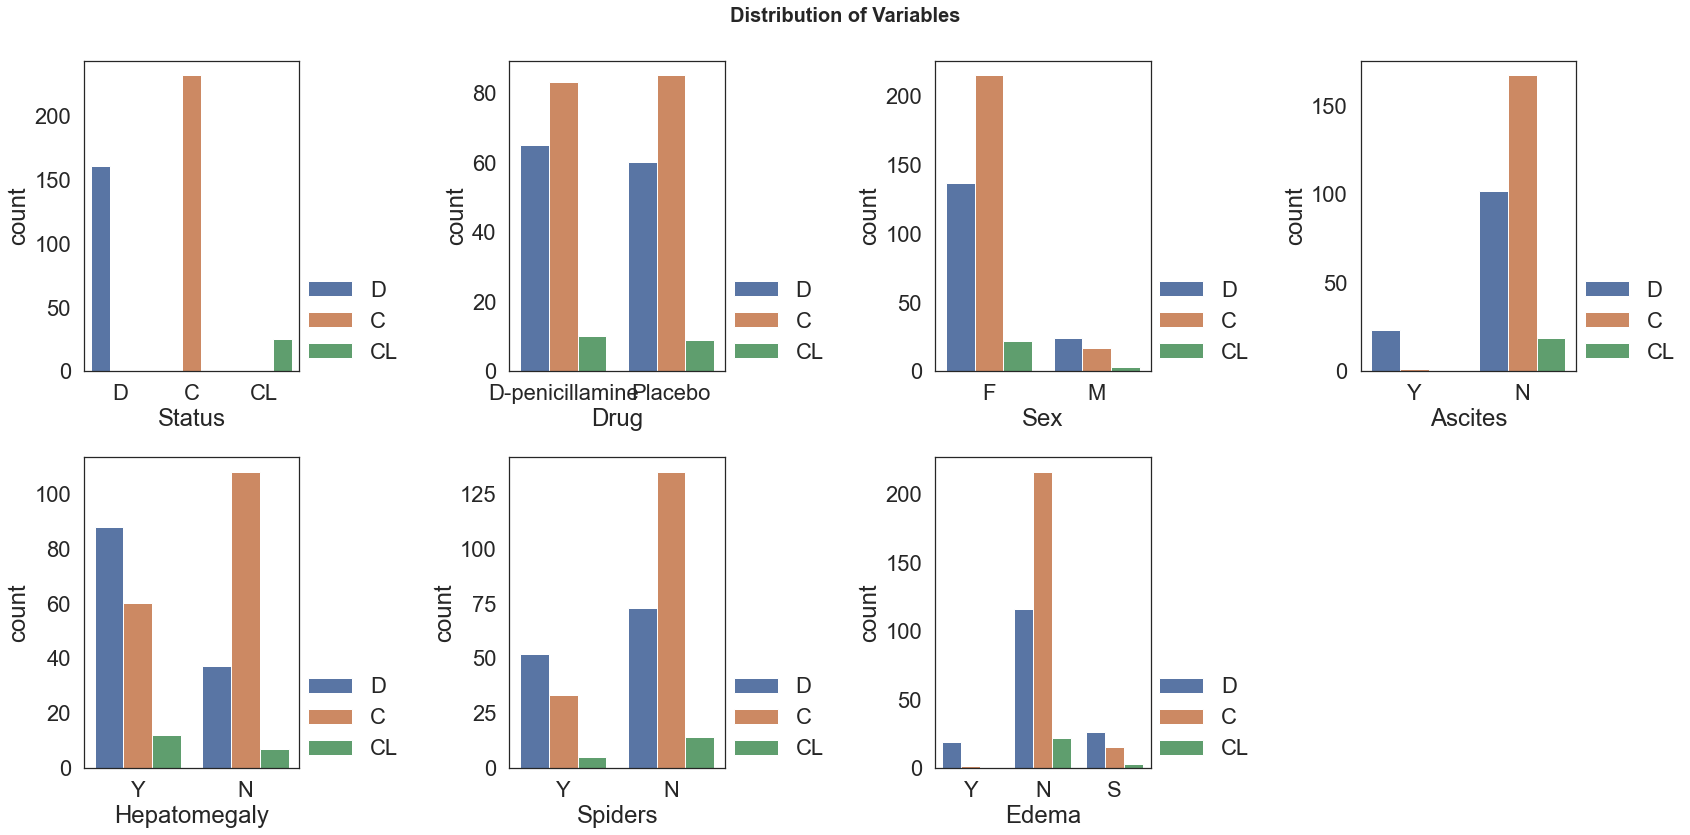

In [137]:
#어느 변수에서 가장 많이 사망을 나타내거나 검출이 되는걸까?

i = 0
plt.figure(figsize=(24,12))
f,ax = plt.subplots(2,4,figsize=(24,12))
plt.delaxes(ax[1][3])
for _ in cat_cols:
    i +=1
    plt.subplot(2,4,i)
    plt.suptitle("Distribution of Variables",fontsize=20,fontweight='bold')
    sns.countplot(data[_],hue=data['Status'])
    plt.legend(loc=[1,0])
    plt.tight_layout();

**Obseravation**

* 검출은 Female에서 주로 발견이되고, Male에서는 검출보다 비교적으로 Death가 약간 높다.
* Ascites,Hepatomegaly, Spiders, Edema를 가지고 있을 때가 가장 위험한 것을 알 수 있다.

> Ascites 등의 질병을 가지고 있을 때 가장 위험한 간병변 수준을 가집니다. 또한 조기 발견이 중요한 만큼 정기적으로 신체 검사가 필요한 부분입니다.

# Feature Engineering

In [4]:
#Age
data['Age'] = round(data['Age']/365,0)

<AxesSubplot:ylabel='Frequency'>

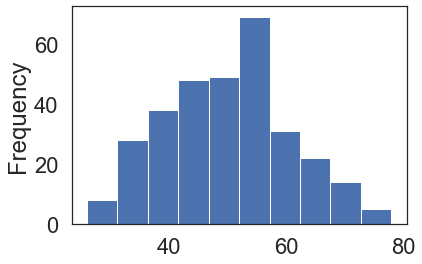

In [176]:
data['Age'].plot.hist()

# Preprcessing

## 결측값 채우기

In [179]:
data.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

* 갯수가 106개로 비슷하네요. 살펴봐야겠습니다.

In [156]:
data[data['Drug'].isnull()]

N_Days Status Drug     Age Sex Ascites Hepatomegaly Spiders Edema  \
312    4062      C  NaN 60.0000   F     NaN          NaN     NaN     N   
313    3561      D  NaN 65.0000   F     NaN          NaN     NaN     S   
314    2844      C  NaN 54.0000   F     NaN          NaN     NaN     N   
315    2071      D  NaN 75.0000   F     NaN          NaN     NaN     S   
316    3030      C  NaN 62.0000   F     NaN          NaN     NaN     N   
..      ...    ...  ...     ...  ..     ...          ...     ...   ...   
413     681      D  NaN 67.0000   F     NaN          NaN     NaN     N   
414    1103      C  NaN 39.0000   F     NaN          NaN     NaN     N   
415    1055      C  NaN 57.0000   F     NaN          NaN     NaN     N   
416     691      C  NaN 58.0000   F     NaN          NaN     NaN     N   
417     976      C  NaN 53.0000   F     NaN          NaN     NaN     N   

     Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  SGOT  Tryglicerides  \
312     0.7000          NaN   3.6500     NaN       NaN   NaN            NaN   
313     1.4000          NaN   3.0400     NaN       NaN   NaN            NaN   
314     0.7000          NaN   4.0300     NaN       NaN   NaN            NaN   
315     0.7000          NaN   3.9600     NaN       NaN   NaN            NaN   
316     0.8000          NaN   2.4800     NaN       NaN   NaN            NaN   
..         ...          ...      ...     ...       ...   ...            ...   
413     1.2000          NaN   2.9600     NaN       NaN   NaN            NaN   
414     0.9000          NaN   3.8300     NaN       NaN   NaN            NaN   
415     1.6000          NaN   3.4200     NaN       NaN   NaN            NaN   
416     0.8000          NaN   3.7500     NaN       NaN   NaN            NaN   
417     0.7000          NaN   3.2900     NaN       NaN   NaN            NaN   

     Platelets  Prothrombin  Stage  
312   378.0000      11.0000    NaN  
313   331.0000      12.1000 4.0000  
314   226.0000       9.8000 4.0000  
315        NaN      11.3000 4.0000  
316   273.0000      10.0000    NaN  
..         ...          ...    ...  
413   174.0000      10.9000 3.0000  
414   180.0000      11.2000 4.0000  
415   143.0000       9.9000 3.0000  
416   269.0000      10.4000 3.0000  
417   350.0000      10.6000 4.0000  

[106 rows x 19 columns]

* 결측값이 연속으로 분포되어 있으니 not randomly Distribution입니다.  의도적으로 비워둔 값인 것 같습니다. drop을 해야겠습니다.

In [60]:
data.dropna(subset='Drug',inplace=True)

In [61]:
data.isnull().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [62]:
data['Cholesterol'].fillna(data['Cholesterol'].median(),inplace=True)
data['Tryglicerides'].fillna(data['Tryglicerides'].median(),inplace=True)
data['Copper'].fillna(data['Copper'].median(),inplace=True)
data['Platelets'].fillna(data['Platelets'].median(),inplace=True)

In [173]:
data.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# Modeling

해당 데이터셋은 EDA를 위한 데이터셋입니다. 내친김에 모델 구축도 해보려 합니다.

In [63]:
data['Sex'] = data['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
data['Ascites'] = data['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
data['Drug'] = data['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
data['Hepatomegaly'] = data['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
data['Spiders'] = data['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
data['Edema'] = data['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
data['Status'] = data['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

X = data.drop(['Stage'],1)
y = data.Stage

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no):
    X_train = train
    y_train = y.iloc[train_index]
    X_test = test
    y_test = y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    acc.append(score)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.4375
For Fold 2 the accuracy is 0.46875
For Fold 3 the accuracy is 0.4838709677419355
For Fold 4 the accuracy is 0.5483870967741935
For Fold 5 the accuracy is 0.5806451612903226
For Fold 6 the accuracy is 0.3870967741935484
For Fold 7 the accuracy is 0.3548387096774194
For Fold 8 the accuracy is 0.5161290322580645
For Fold 9 the accuracy is 0.45161290322580644
For Fold 10 the accuracy is 0.5483870967741935

XGboost model Mean Accuracy =  0.4777217741935484


너무 적은 데이터셋이라 역시 좋은 성능을 보여주지 않습니다.

# 다른 방법

결측값을 mice로 채워보도록 합니다. 원데이터를 가져오고 전처리하고 결측치를 drop하기 전까지의 단계로 옵니다.

In [180]:
data.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [49]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

mice_imputer = IterativeImputer()
df = data.copy()

for i in num_cols:
    df[i] = mice_imputer.fit_transform(df[[i]])

df.head()

N_Days Status             Drug     Age Sex Ascites Hepatomegaly Spiders  \
0  400.0000      D  D-penicillamine 59.0000   F       Y            Y       Y   
1 4500.0000      C  D-penicillamine 56.0000   F       N            Y       Y   
2 1012.0000      D  D-penicillamine 70.0000   M       N            N       N   
3 1925.0000      D  D-penicillamine 55.0000   F       N            Y       Y   
4 1504.0000     CL          Placebo 38.0000   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin   Copper  Alk_Phos     SGOT  \
0     Y    14.5000     261.0000   2.6000 156.0000 1718.0000 137.9500   
1     N     1.1000     302.0000   4.1400  54.0000 7394.8000 113.5200   
2     S     1.4000     176.0000   3.4800 210.0000  516.0000  96.1000   
3     S     1.8000     244.0000   2.5400  64.0000 6121.8000  60.6300   
4     N     3.4000     279.0000   3.5300 143.0000  671.0000 113.1500   

   Tryglicerides  Platelets  Prothrombin  Stage  
0       172.0000   190.0000      12.2000 4.0000  
1        88.0000   221.0000      10.6000 3.0000  
2        55.0000   151.0000      12.0000 4.0000  
3        92.0000   183.0000      10.3000 4.0000  
4        72.0000   136.0000      10.9000 3.0000

In [50]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              6
dtype: int64

In [51]:
df['Drug'].fillna(df['Drug'].mode()[0],inplace=True)
df['Ascites'].fillna(df['Ascites'].mode()[0],inplace=True)
df['Hepatomegaly'].fillna(df['Hepatomegaly'].mode()[0],inplace=True)
df['Spiders'].fillna(df['Spiders'].mode()[0],inplace=True)

* Categorical Variables은 최빈값으로 채우도록 하죠.

In [52]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            6
dtype: int64

In [53]:
df = df.dropna()

* target, 즉 Stage 변수 4개의 클래스로 분류되어 있는데, mice를 하면 소수점까지 표현이 됩니다. 그럼 분류가 되지 않고 회귀문제가 되겠지요. 그래서 Stage 변수 내 6개의 missing data를 drop합니다.

In [54]:
# replacing catagorical data with intigers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1

X = df.drop(['Stage'],1)
y = df.Stage

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no):
    X_train = train
    y_train = y.iloc[train_index]
    X_test = test
    y_test = y.iloc[test_index]
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    acc.append(score)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
    train = X.iloc[train_index,:]
    test = X.iloc[test_index,:]
    training(train, test, fold_no)
    fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.6190476190476191
For Fold 2 the accuracy is 0.5238095238095238
For Fold 3 the accuracy is 0.4146341463414634
For Fold 4 the accuracy is 0.4878048780487805
For Fold 5 the accuracy is 0.4878048780487805
For Fold 6 the accuracy is 0.4878048780487805
For Fold 7 the accuracy is 0.4146341463414634
For Fold 8 the accuracy is 0.5853658536585366
For Fold 9 the accuracy is 0.43902439024390244
For Fold 10 the accuracy is 0.5121951219512195

XGboost model Mean Accuracy =  0.497212543554007


dropna를 하지않고 Mice로 결측치를 채웠더니 점수가 상승했습니다.

# 마치며

해당 데이터가 우리에게 어떤 것을 말하고 있을까요?

* 첫째, 남녀 성별에 상관없이 간병변이 일어납니다.
* 둘째, 간병변 3단계일 때 검출이 많이 되었고, 4단계일 때 검출보다 죽음이 앞섭니다.
* 셋째, 타 질병을 가지고 있는 사람들이 높은 위험 수준의 간병변을 보여줍니다.

```남녀 상관없이 조기 검진이 되어야 합니다. 그리고 간병변과 관련한 질병들을 가지고 있을 때 연계 검진이 필요합니다```